In [1]:
# import packages
import pybeam.precoded as pbp
import numpy as np


In [2]:
# define model
model = pbp.moving_thresholds(thresholds = 'weibull')

# model parameters
model.parameters()


['tnd', 'w', 'mu', 'b', 'lamb', 'kappa', 'c']

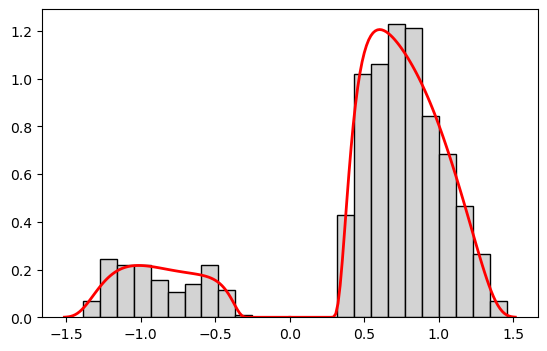

In [3]:
phi = {'tnd' : 0.25,          # non-decision time
         'w' : 0.5,           # relative start point
        'mu' : 1.0,           # drift rate
         'b' : 1.0,          # threshold
      'lamb' : np.log10(1.0), # shape parameter
     'kappa' : np.log10(3.0), # scale parameter
         'c' : -1.0}          # collapse parameter

rt = pbp.simulate(N_sims = 1000, model = model, phi = phi)
fig = pbp.plot_rt(model = model, phi = phi, rt_max = 1.5, rt = rt);


In [4]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', 
       'p_b' : 'Uniform("b", lower = 0.1, upper = 2.5)',
    'p_lamb' : 'Uniform("lamb", lower = -1.0, upper = 2.0)',
   'p_kappa' : 'Uniform("kappa", lower = -1.0, upper = 2.0)',
         'c' : -1.0}

c0 = {'rt' : rt, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'b' : 'p_b',
    'lamb' : 'p_lamb',
   'kappa' : 'p_kappa',
       'c' : 'c'}

c = {0 : c0}

idata = pbp.inference(model = model,   
                     priors = p,       
                 conditions = c,       
                    samples = 25000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'weibull_thresholds')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [kappa, lamb, b, mu, w, tnd]


/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 32 seconds.


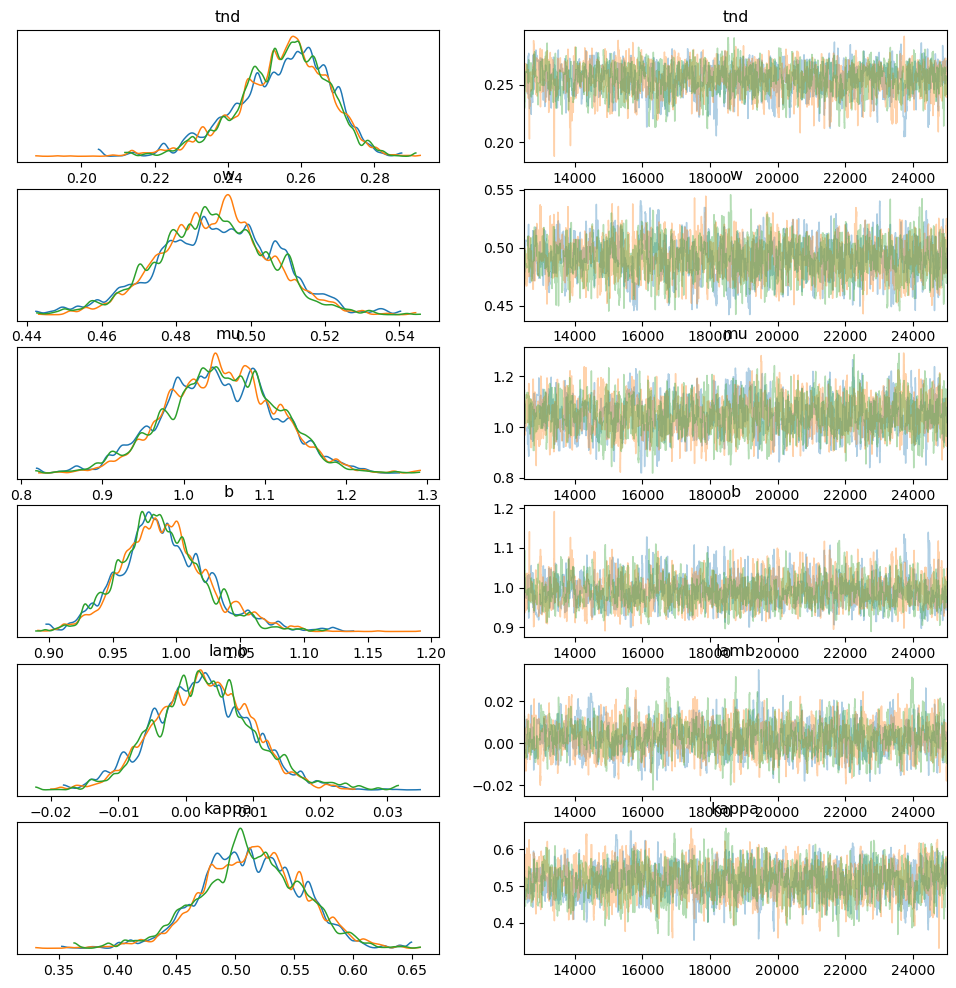

In [5]:
pbp.plot_idata(file_name = 'weibull_thresholds', burnin = 12500);


In [7]:
pbp.summary(file_name = 'weibull_thresholds', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.255,0.012,0.230,0.276,0.000,0.000,1182.0,1372.0,1.00
w,0.491,0.015,0.463,0.520,0.000,0.000,1039.0,1510.0,1.01
mu,1.046,0.067,0.918,1.166,0.002,0.002,957.0,1809.0,1.00
b,0.990,0.035,0.926,1.057,0.001,0.001,1050.0,1434.0,1.00
lamb,0.003,0.007,-0.011,0.016,0.000,0.000,929.0,1141.0,1.00
kappa,0.513,0.042,0.437,0.592,0.001,0.001,911.0,1571.0,1.00
